In [1]:
!ls

bucket_size_results_algorithm_1_mh_20000000.tsv   bucket_sort_1.cpp
bucket_size_results_algorithm_1_mh_50000000.tsv   bucket_sort_2
bucket_size_results_algorithm_1_pk_20000000.tsv   bucket_sort_2.cpp
bucket_size_results_algorithm_1_pk_200000000.tsv  compile-vnode.sh
bucket_size_results_algorithm_1_pk_50000000.tsv   compile.sh
bucket_size_results_algorithm_2_mh_20000000.tsv   find_buckets.sh
bucket_size_results_algorithm_2_mh_50000000.tsv   notebook.ipynb
bucket_size_results_algorithm_2_pk_20000000.tsv   par_results_laptop.tsv
bucket_size_results_algorithm_2_pk_50000000.tsv   random_seq
bucket_sort_1					  seq_results_laptop.tsv


In [7]:
!pip3 install pandas

     |████████████████████████████████| 9.7 MB 1.6 MB/s eta 0:00:01


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

def convert_time(exec_time):
    #minutes = float(exec_time.split("m")[0])
    seconds = float(exec_time.split("s")[0])
    return seconds


In [3]:
def parse_data(filename):
    df1 = pd.read_csv(filename, sep="\t")

    df1["time_a"] = df1["time_a"].apply(convert_time)
    df1["time_b"] = df1["time_b"].apply(convert_time)
    df1["time_c"] = df1["time_c"].apply(convert_time)
    df1["time_d"] = df1["time_d"].apply(convert_time)
    df1["time_e"] = df1["time_e"].apply(convert_time)


    df1 = df1.groupby(['bucket_range'], as_index=False)
    df1 = df1.agg({'time_a':['mean','std'], 'time_b':['mean','std'],'time_c':['mean','std'],'time_d':['mean','std'],'time_e':['mean','std']})

    return df1

In [9]:
df1 = parse_data("bucket_size_results_algorithm_1_pk_50000000.tsv")
df2 = parse_data("bucket_size_results_algorithm_2_pk_50000000.tsv")

df1

bucket_range    time_a              time_b              time_c            \
                     mean       std      mean       std      mean       std   
0            64  0.222859  0.017436  7.221821  0.184561  0.838319  0.002289   
1           128  0.222871  0.018761  7.762835  1.066822  1.053591  0.049944   
2           256  0.226742  0.010348  6.828732  1.619238  1.207779  0.035967   
3           512  0.230228  0.012342  4.076589  0.578214  1.357152  0.053276   
4          1024  0.249154  0.036195  2.339141  0.112579  1.650634  0.371689   
5          2048  0.235165  0.007688  1.621303  0.081938  1.669386  0.022666   
6          4096  0.224145  0.014696  1.152127  0.121628  1.782421  0.077920   
7          8196  0.241962  0.030534  1.017808  0.124637  1.990281  0.090642   
8         20480  0.233052  0.018383  0.650179  0.039326  2.148656  0.098208   
9         40960  0.233166  0.018749  0.474841  0.015757  2.390799  0.147635   
10        81960  0.235586  0.022572  0.465273  0.047013  2.435097  0.134539   
11       204800  0.233373  0.019281  0.442144  0.019092  2.645969  0.079413   
12       409600  0.266233  0.044153  0.450199  0.038850  2.792235  0.040476   
13       819600  0.225908  0.011979  0.425616  0.019684  3.027172  0.203354   
14      1639200  0.276888  0.022649  0.469916  0.040700  3.455705  0.267965   
15      3278400  0.260977  0.021396  0.448277  0.045502  3.621857  0.261554   
16      6556800  0.304195  0.059650  0.503462  0.065634  3.876769  0.167236   

      time_d              time_e            
        mean       std      mean       std  
0   0.084655  0.009887  8.367654  0.185512  
1   0.066241  0.006573  9.105538  1.122703  
2   0.066366  0.012780  8.329619  1.646065  
3   0.059150  0.008778  5.723119  0.617104  
4   0.060483  0.015513  4.299412  0.352875  
5   0.055731  0.012110  3.581585  0.081219  
6   0.055780  0.022322  3.214474  0.158111  
7   0.044400  0.008627  3.294450  0.172152  
8   0.055320  0.008403  3.087207  0.157569  
9   0.052735  0.011988  3.151542  0.149450  
10  0.050854  0.010616  3.186811  0.163867  
11  0.041657  0.005851  3.363141  0.088328  
12  0.045810  0.010092  3.554477  0.042643  
13  0.035100  0.004151  3.713797  0.191863  
14  0.039343  0.003017  4.241852  0.302015  
15  0.041615  0.007718  4.372726  0.234483  
16  0.046227  0.016011  4.730653  0.227293

In [10]:
df2

bucket_range    time_a               time_b              time_c            \
                     mean       std       mean       std      mean       std   
0            64  0.244794  0.028439  12.908054  0.527855  0.902384  0.026775   
1           128  0.247759  0.031102  10.411760  0.388914  1.053053  0.023301   
2           256  0.244367  0.029939   7.342762  0.533893  1.184803  0.017216   
3           512  0.234661  0.008851   4.888667  0.146944  1.347010  0.051924   
4          1024  0.227870  0.009237   3.379979  0.243191  1.470081  0.029134   
5          2048  0.222068  0.004537   2.076613  0.094170  1.587365  0.019250   
6          4096  0.218943  0.003572   1.716601  0.039933  1.703852  0.019468   
7          8196  0.218220  0.004375   1.386116  0.040220  1.859128  0.025138   
8         20480  0.221911  0.004546   1.064526  0.017332  2.031026  0.014739   
9         40960  0.223158  0.012015   0.845873  0.013830  2.165190  0.032013   
10        81960  0.222623  0.013610   0.787085  0.010293  2.291410  0.034264   
11       204800  0.217220  0.002420   0.776137  0.007452  2.464512  0.019519   
12       409600  0.228981  0.010416   0.787592  0.028951  2.617456  0.018749   
13       819600  0.224677  0.009620   0.801661  0.050273  2.753767  0.058173   
14      1639200  0.275687  0.032441   1.020054  0.157206  3.693201  0.172522   
15      3278400  0.290412  0.027144   1.119788  0.207428  3.726699  0.177310   
16      6556800  0.228919  0.011103   0.895853  0.180637  3.247555  0.068987   

      time_d               time_e            
        mean       std       mean       std  
0   0.042360  0.002952  14.097593  0.559374  
1   0.044765  0.002357  11.757338  0.372008  
2   0.039709  0.004045   8.811642  0.536675  
3   0.038482  0.003146   6.508820  0.160607  
4   0.037836  0.002647   5.115766  0.271057  
5   0.037191  0.004838   3.923237  0.093544  
6   0.033435  0.002998   3.672830  0.041090  
7   0.033750  0.003656   3.497214  0.034478  
8   0.035763  0.006515   3.353226  0.012527  
9   0.032978  0.003255   3.267200  0.035307  
10  0.031655  0.002704   3.332773  0.031557  
11  0.033473  0.003434   3.491341  0.014605  
12  0.031710  0.003307   3.665738  0.051540  
13  0.030798  0.002473   3.810903  0.074941  
14  0.053556  0.018552   5.042499  0.304742  
15  0.047261  0.007807   5.184159  0.337882  
16  0.032709  0.003130   4.405037  0.185119

In [11]:
def plot_bucket_times(df):
    fig = plt.figure(figsize=(12, 7), dpi=80)
    plt.title("Time of execution by bucket size")
    plt.xlabel("Bucker size")
    plt.ylabel("Time [s]")

    ax = fig.add_subplot(1, 1, 1)

    ax.set_xscale('log')
    ax.set_yscale('linear')
    plt.xlim([32, 6556800*2])

    plt.errorbar(df['bucket_range'], df['time_e']["mean"], df['time_e']["std"], linestyle='None', zorder=3, elinewidth=1, capsize=2)
    
    plt.scatter(df['bucket_range'], df['time_e']['mean'])

<ipython-input-11-cbcaa3a847d4>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


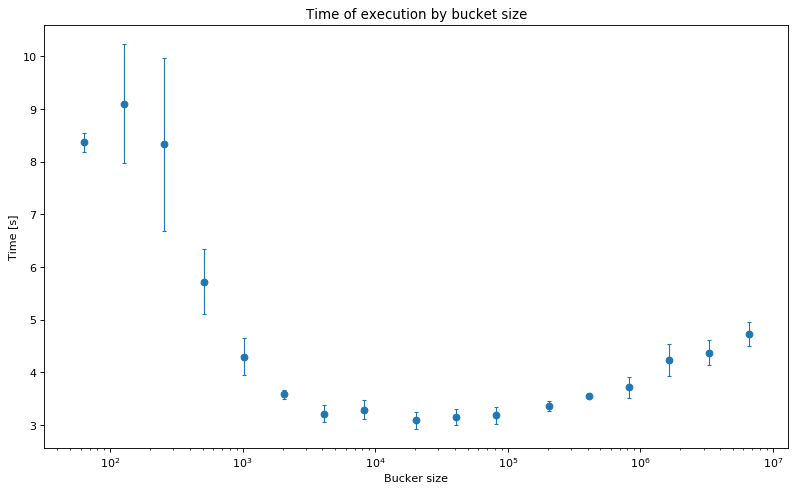

In [12]:
plot_bucket_times(df1)

<ipython-input-11-cbcaa3a847d4>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


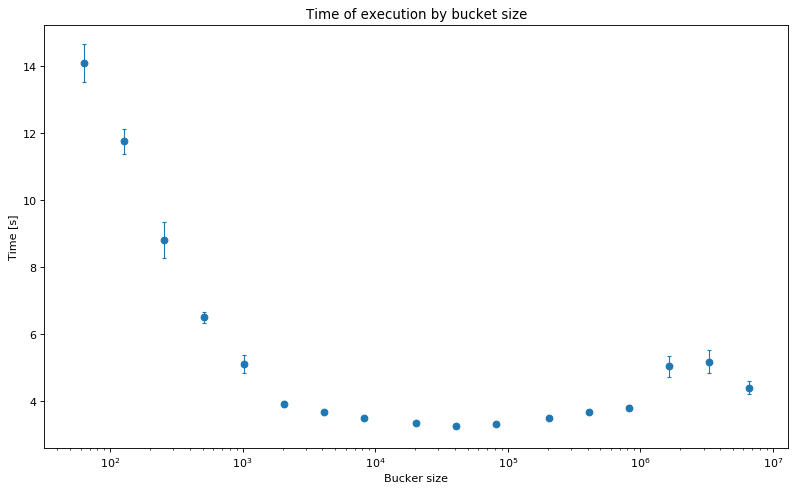

In [13]:
plot_bucket_times(df2)

In [14]:
def plot_bucket_times_bc(df):
    fig = plt.figure(figsize=(12, 7), dpi=80)
    plt.title("Time of execution by bucket size")
    plt.xlabel("Bucker size")
    plt.ylabel("Time [s]")

    ax = fig.add_subplot(1, 1, 1)

    ax.set_xscale('log')
    ax.set_yscale('linear')
    plt.xlim([32, 6556800])

    plt.plot(df['bucket_range'], df['time_b']['mean'], "--o", label="bucket insertion time") 
    plt.plot(df['bucket_range'], df['time_c']['mean'], "--o", label="bucket sorting time")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

<ipython-input-14-874b3aeee9d0>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: Futur

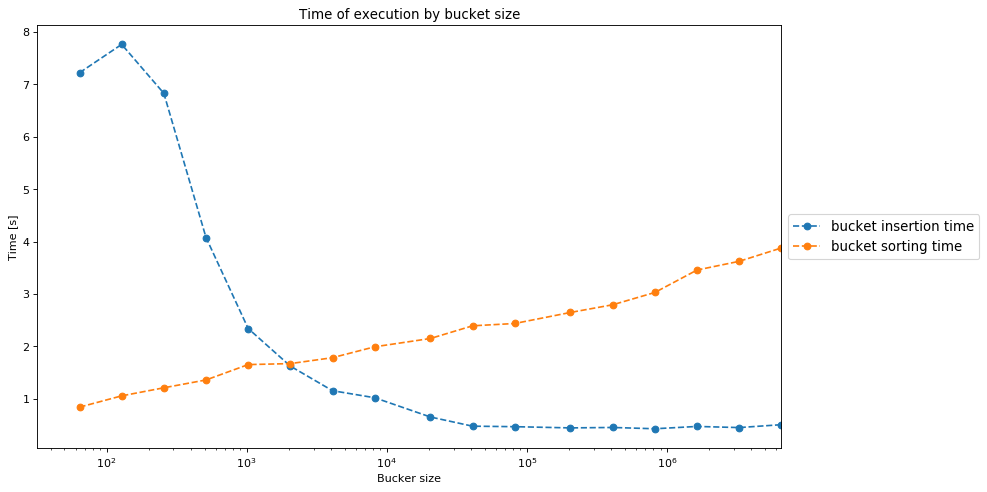

In [15]:
plot_bucket_times_bc(df1)

<ipython-input-14-874b3aeee9d0>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


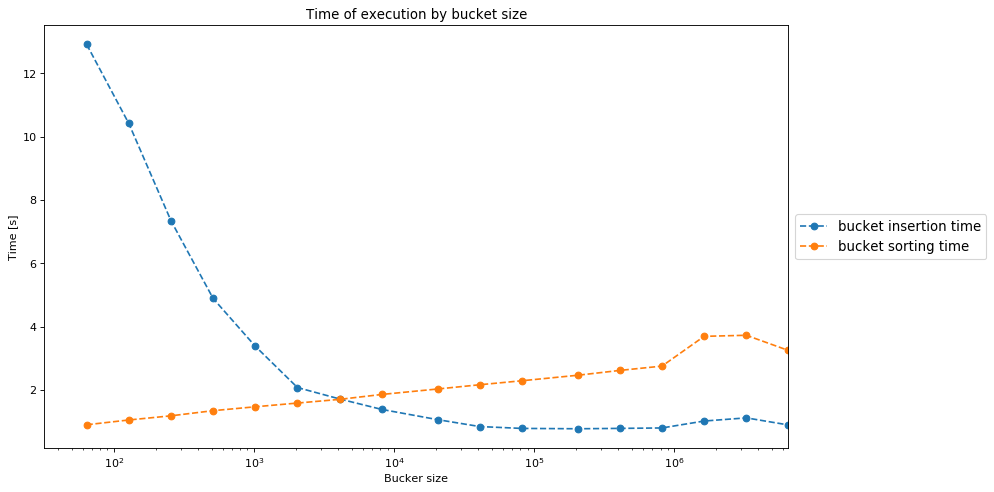

In [16]:
plot_bucket_times_bc(df2)

- best for algorithm1 - 20480
- best for algorithm2 - 40960

In [17]:
df_seq = pd.read_csv("seq_results_laptop.tsv", sep="\t")
df_par = pd.read_csv("par_results_laptop.tsv", sep="\t")

df_seq["type"] = "sequential"
df_par["type"] = "parallel"

df = pd.concat([df_seq, df_par])

def convert_time(exec_time):
    minutes = float(exec_time.split("m")[0])
    seconds = float(exec_time.split("m")[1].split("s")[0])
    return minutes * 60 + seconds

def scheduling_type(scheduling):
    if str(scheduling) == 'nan':
        return None
    return scheduling.split(",")[0]

def chunk_size(scheduling):
    if str(scheduling) == 'nan':
        return None
    try: 
        return int(scheduling.split(",")[1])
    except IndexError:
        return 'Default'

df["time"] = df["time"].apply(convert_time)

df["scheduling_type"] = df["scheduling"].apply(scheduling_type)
df["scheduling_chunk_size"] = df["scheduling"].apply(chunk_size)

def calculate_absolute_speedup(df):
    sequential_time = df[df["type"]=="sequential"]["time"].mean()
    df["absolute_speedup"] = np.nan
    df.loc[df["type"] == "parallel", 'absolute_speedup'] = sequential_time / df[df["type"] == "parallel"]["time"]
    return df

df = df.groupby(['tab_size'], as_index=False).apply(calculate_absolute_speedup)

df = df.groupby(['type', 'tab_size', 'scheduling_type', 'threads', 'scheduling_chunk_size'], as_index=False).agg({'time':['mean','std'], 'absolute_speedup':['mean','std']})

# tmp = df.groupby(['type', 'problem_size', 'instance_type'], as_index=False)

df


type   tab_size scheduling_type threads scheduling_chunk_size    time  \
                                                                         mean   
0   parallel          2          guided       1                  16.0  0.0012   
1   parallel          2          guided       4                  16.0  0.0025   
2   parallel          2          guided       6                  16.0  0.0048   
3   parallel          2          guided       8                  16.0  0.0023   
4   parallel          2          guided      12                  16.0  0.0020   
5   parallel          2          guided      24                  16.0  0.0062   
6   parallel         20          guided       1                  16.0  0.0030   
7   parallel         20          guided       4                  16.0  0.0018   
8   parallel         20          guided       6                  16.0  0.0139   
9   parallel         20          guided       8                  16.0  0.0026   
10  parallel         20          guided      12                  16.0  0.0165   
11  parallel         20          guided      24                  16.0  0.0209   
12  parallel        200          guided       1                  16.0  0.0011   
13  parallel        200          guided       4                  16.0  0.0025   
14  parallel        200          guided       6                  16.0  0.0050   
15  parallel        200          guided       8                  16.0  0.0048   
16  parallel        200          guided      12                  16.0  0.0024   
17  parallel        200          guided      24                  16.0  0.0039   
18  parallel       2000          guided       1                  16.0  0.0016   
19  parallel       2000          guided       4                  16.0  0.0118   
20  parallel       2000          guided       6                  16.0  0.0079   
21  parallel       2000          guided       8                  16.0  0.0093   
22  parallel       2000          guided      12                  16.0  0.0035   
23  parallel       2000          guided      24                  16.0  0.0042   
24  parallel      20000          guided       1                  16.0  0.0017   
25  parallel      20000          guided       4                  16.0  0.0015   
26  parallel      20000          guided       6                  16.0  0.0107   
27  parallel      20000          guided       8                  16.0  0.0056   
28  parallel      20000          guided      12                  16.0  0.0037   
29  parallel      20000          guided      24                  16.0  0.0052   
30  parallel     200000          guided       1                  16.0  0.0031   
31  parallel     200000          guided       4                  16.0  0.0036   
32  parallel     200000          guided       6                  16.0  0.0067   
33  parallel     200000          guided       8                  16.0  0.0061   
34  parallel     200000          guided      12                  16.0  0.0054   
35  parallel     200000          guided      24                  16.0  0.0065   
36  parallel    2000000          guided       1                  16.0  0.0179   
37  parallel    2000000          guided       4                  16.0  0.0093   
38  parallel    2000000          guided       6                  16.0  0.0144   
39  parallel    2000000          guided       8                  16.0  0.0144   
40  parallel    2000000          guided      12                  16.0  0.0183   
41  parallel    2000000          guided      24                  16.0  0.0168   
42  parallel   20000000          guided       1                  16.0  0.2326   
43  parallel   20000000          guided       4                  16.0  0.1011   
44  parallel   20000000          guided       6                  16.0  0.1101   
45  parallel   20000000          guided       8                  16.0  0.0832   
46  parallel   20000000          guided      12                  16.0  0.1333   
47  parallel   20000000          guided

In [19]:
def add_to_plot(x, y, df, color, label, div = None):
    if div is None:
        df = df.sort_values(by=[x])
        plt.plot(df[x], df[y]["mean"], 'o--', color=color, label=label)
#         plt.errorbar(df[x], df[y]["mean"], df[y]["std"], linestyle='None', color=color, zorder=3, elinewidth=1, capsize=2)
    else:
        df = df.sort_values(by=[x])
        plt.plot(df[x], df[y]["mean"] / df[y].iloc[0]["mean"], 'o--', color=color, label=label)
#         plt.errorbar(df[x], df[y]["mean"], df[y]["std"] / df[y].iloc[0]["std"], linestyle='None', color=color, zorder=3, elinewidth=1, capsize=2)

In [20]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS)

<ipython-input-22-e8f849a18e3c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 1, 1)


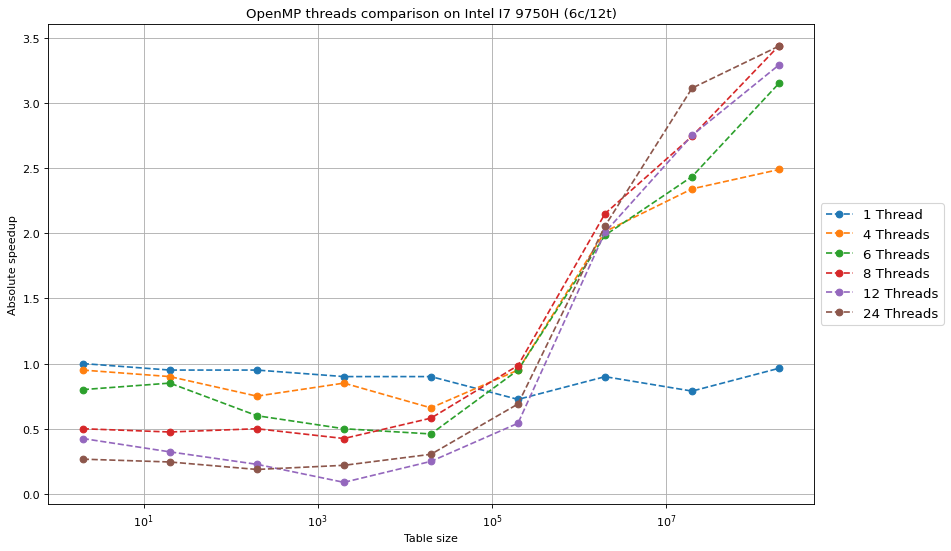

In [22]:
fig = plt.figure(figsize=(12, 7), dpi=80)
plt.title("OpenMP threads comparison on Intel I7 9750H (6c/12t)")
plt.xlabel("Table size")
plt.ylabel("Absolute speedup")

ax = fig.add_subplot(1, 1, 1)


add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 1)], colors[0], "1 Thread")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 4)], colors[1], "4 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 6)], colors[2], "6 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 8)], colors[3], "8 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 12)], colors[4], "12 Threads")
add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'guided') & (df['threads'] == 24)], colors[5], "24 Threads")

# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == None)], colors[5], "dynamic")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 1)], colors[6], "dynamic,1")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 4)], colors[7], "dynamic,4")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 64)], colors[8], "dynamic,64")
# add_to_plot('tab_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'dynamic') & (df['scheduling_chunk_size'] == 4096)], colors[9], "dynamic,4096")

y_vals = df[(df['tab_size'] == df['tab_size'].max())]['time']['mean']


plt.yticks(y_vals[np.isnan(y_vals) == False])

ax.set_xscale('log')
ax.set_yscale('linear')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.tight_layout()
plt.grid()
plt.show()

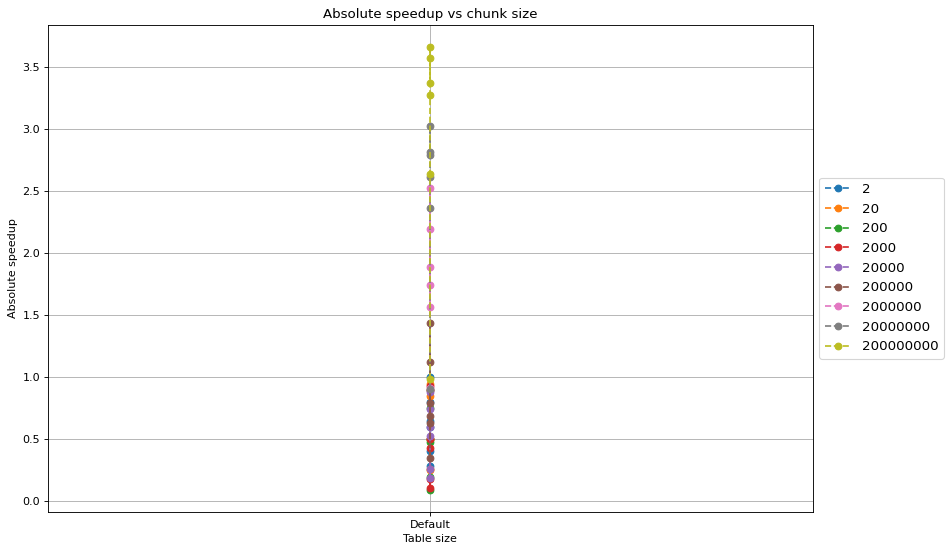

In [16]:
plt.figure(figsize=(12, 7), dpi=80)
plt.title("Absolute speedup vs chunk size" )
plt.xlabel("Table size")
plt.ylabel("Absolute speedup")

add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2)], colors[0], "2")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20)], colors[1], "20")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200)], colors[2], "200")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2000)], colors[3], "2000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20000)], colors[4], "20000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200000)], colors[5], "200000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 2000000)], colors[6], "2000000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 20000000)], colors[7], "20000000")
add_to_plot('scheduling_chunk_size', 'absolute_speedup', df[(df['type'] == 'parallel') & (df['scheduling_type'] == 'static') & (df['tab_size'] == 200000000)], colors[8], "200000000")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.tight_layout()
plt.grid()
plt.show()